In [2]:
import numpy as np

## The issue with this challenge is that limiting to 6 digits makes it too easily brute-forceable. This code is inefficient and inelegint... but still runs in a few seconds. A true job interview question would have many more digits and require more thought to solve.

In [3]:
def does_obey_rules(mynum, mymin = 0, mymax = 9e20):
    
    if mynum < mymin or mynum > mymax: return False
    
    # Break integer into string of integers (single digits)
    num_list = [int(d) for d in str(mynum)]
    
    # check for doubles
    doubles = False

    for i in range(len(num_list)-1):
        if num_list[i+1] == num_list[i]: 
            doubles = True
            break
            
    if not doubles: return False        
    
    # check for decreasing
    decreases = False
    for i in range(len(num_list)-1):
        if num_list[i+1] < num_list[i]: 
            decreases = True
            break
    
    if decreases: return False
    
    return True

In [4]:
#Your puzzle input is 382345-843167.
valid_counter = 0
for x in list(range(328245,843168)):
    if does_obey_rules(x,382345,843167): valid_counter += 1

In [5]:
valid_counter

460

In [6]:
def does_obey_rules_part2(mynum, mymin = 0, mymax = 999999):
    
    if mynum < mymin or mynum > mymax: return False
    
    # Break integer into string of integers (single digits)
    num_list = [int(d) for d in str(mynum)]
    
    # check for doubles
    unique_digits = np.unique(num_list)
    n_each_digit = [0]*10
    for x in range(10):
        for num in num_list:
            if num == x: n_each_digit[x] += 1
    if 2 not in n_each_digit: return False
    
    # check for decreasing
    decreases = False
    for i in range(len(num_list)-1):
        if num_list[i+1] < num_list[i]: 
            decreases = True
            break
    
    if decreases: return False
    
    return True

    print(n_each_digit)

In [7]:
#Your puzzle input is still 382345-843167.
valid_counter = 0
for x in list(range(328245,843168)):
    if does_obey_rules_part2(x,382345,843167): valid_counter += 1

In [8]:
valid_counter

290

In [19]:
# Side test: How does compute time scale with number of digits?
import time

def try_all_possibilities(N):
    for x in range(N):
        does_obey_rules(x)
        
Ns = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
times = []
for N in Ns:
    start = time.time()
    try_all_possibilities(int(N))
    times.append(time.time() - start)

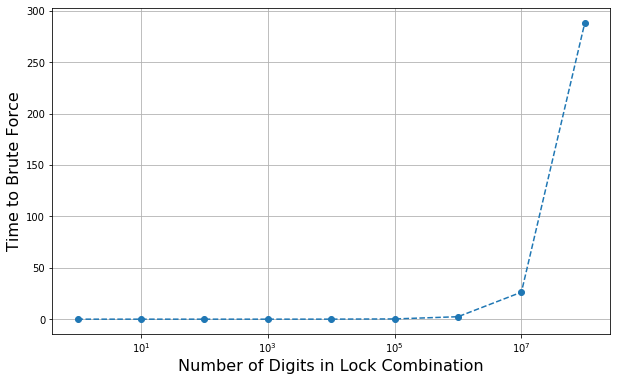

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(Ns, times, 'o--')
plt.xlabel('Number of Digits in Lock Combination', fontsize=16)
plt.ylabel('Time to Brute Force',fontsize=16)
plt.xscale('log')
plt.grid(True,'both')

In [24]:
type(Ns)

list

In [25]:
type(times)

list